In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm_notebook as tqdm
import pandas as pd
import pathlib
from utils import *

# Process results

In [3]:
data_path = pathlib.Path('/home/users/bjornmik/datasets/sweep_5/')

In [4]:
error_trials = compute_error_trials(data_path)

  0%|          | 0/1000 [00:00<?, ?it/s]

In [5]:
errors = compute_errors(data_path)

  0%|          | 0/10 [00:00<?, ?it/s]

In [6]:
errors = compute_error_confidence(errors, error_trials)

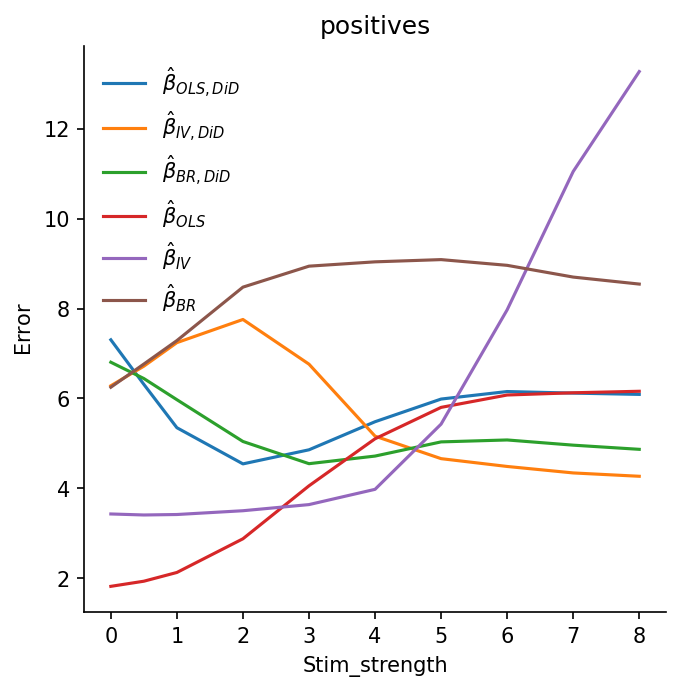

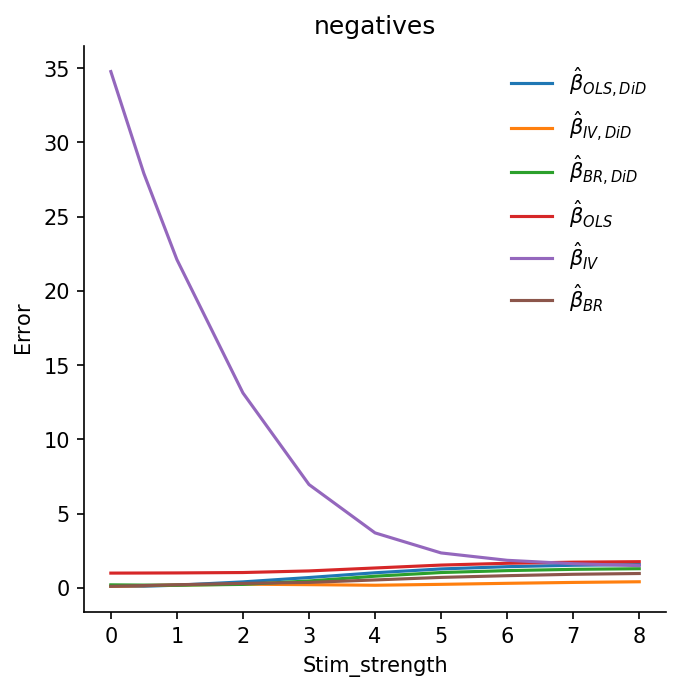

In [9]:
plot_errors(errors, 'stim_strength')

In [10]:
errors['positives'][['stim_strength', 'error_ols_iv_did_pval', 'error_ols_iv_did_statistic']]

,stim_strength,error_ols_iv_did_pval,error_ols_iv_did_statistic
0,8.000000,3.896560e-18,0.0
1,2.000000,3.896560e-18,0.0
2,1.000000,3.896560e-18,0.0
3,0.500000,3.896560e-18,0.0
4,3.000000,3.896560e-18,0.0
5,0.000001,3.896560e-18,0.0
6,7.000000,3.896560e-18,0.0
7,4.000000,3.896560e-18,0.0
8,6.000000,3.896560e-18,0.0
9,5.000000,3.896560e-18,0.0


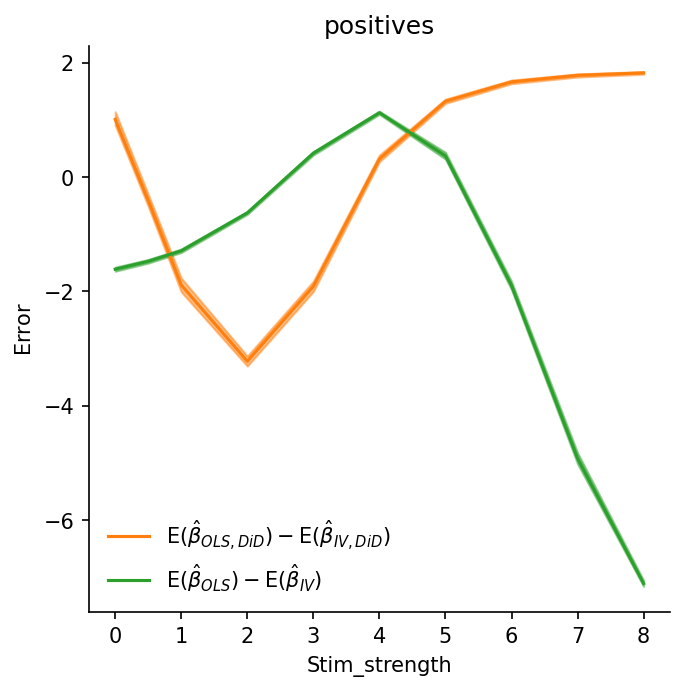

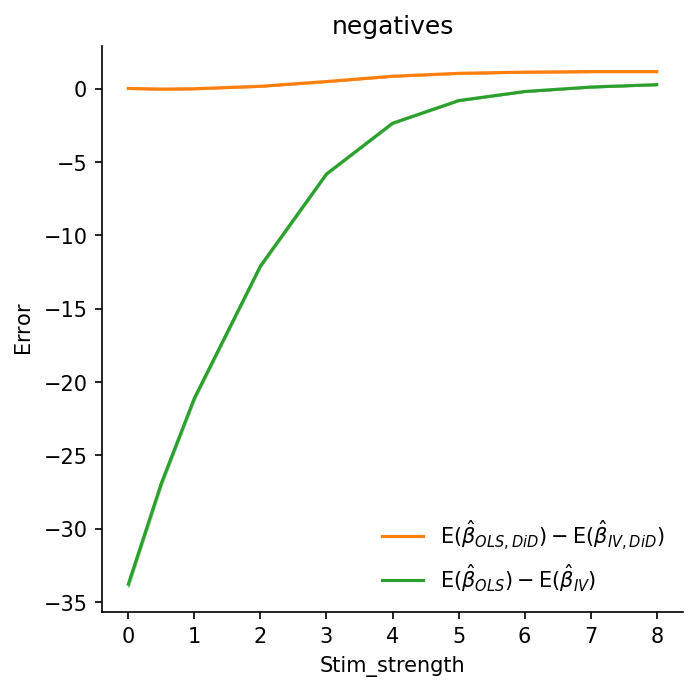

In [11]:
plot_error_difference(errors, 'stim_strength')

# Convergence

In [8]:
error_convergence = compute_error_convergence(data_path)

  0%|          | 0/2560 [00:00<?, ?it/s]

In [22]:
error_convergence_trials = compute_error_convergence_trials(data_path)

  0%|          | 0/15000 [00:00<?, ?it/s]

In [13]:
samples = compute_all_samples(data_path)

  0%|          | 0/10 [00:00<?, ?it/s]

In [27]:
index = int(errors['positives'].query('stim_strength==1e-6').index.values)
index

5

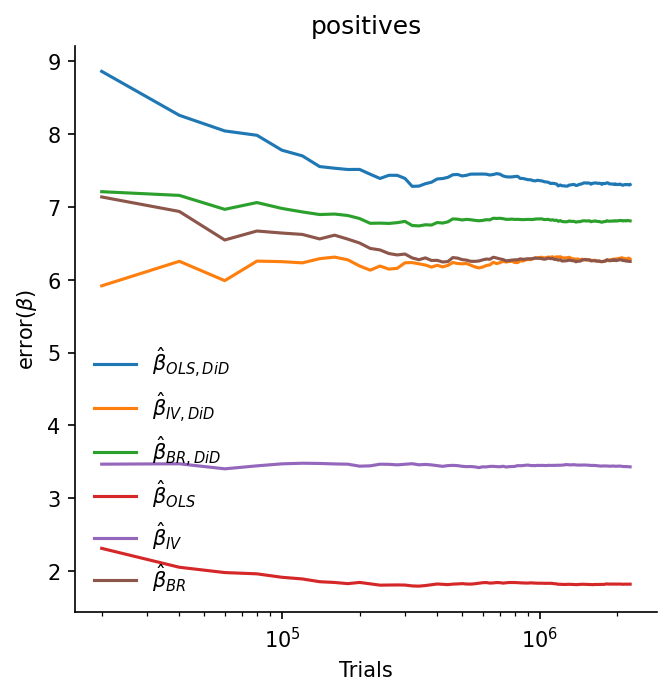

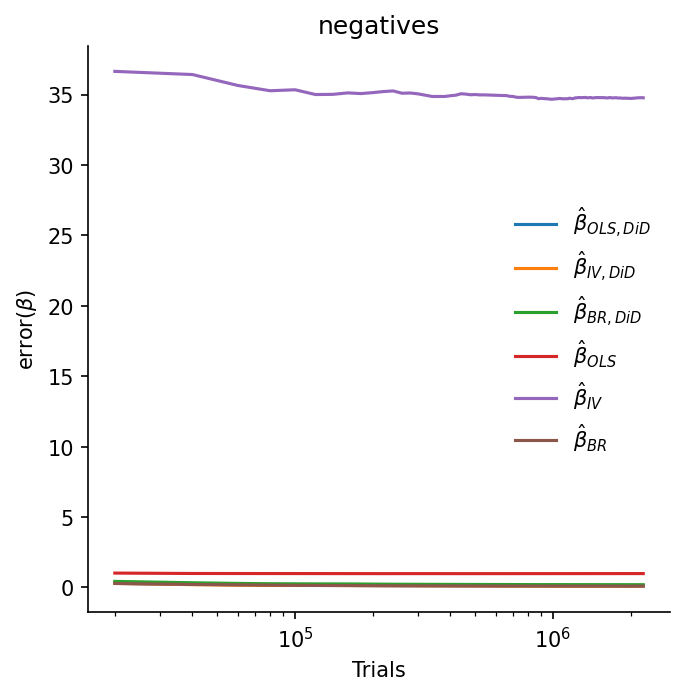

In [28]:
plot_error_convergence(error_convergence, index)

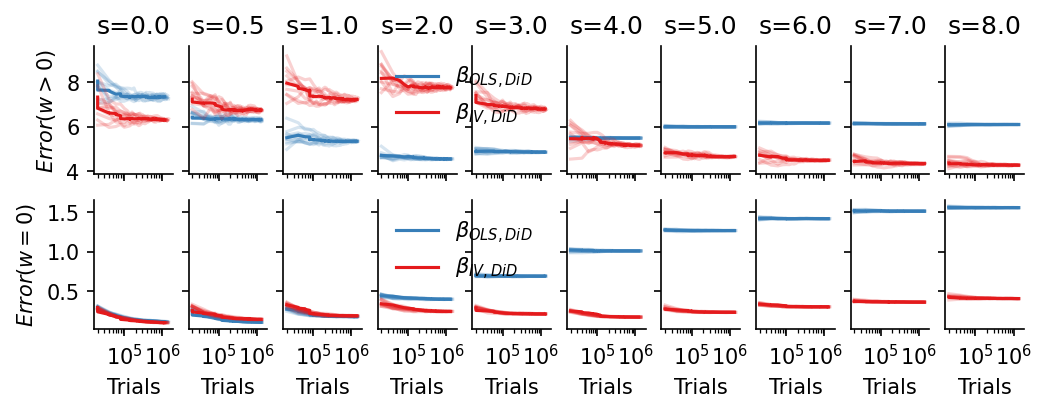

In [32]:
fig, axs = plt.subplots(2, 10, sharex=True, sharey='row', figsize=(8,2.5), dpi=150)
for i, (stim_strength, df) in enumerate(errors['positives'].groupby('stim_strength')):
    index = int(df.index.values)
    plot_error_convergence_trials( 
        error_convergence_trials, 
        index, 
        keys=['error_beta_ols_did','error_beta_iv_did'], 
        axs=axs.T[i], legend=i==4, xlabels=(False,True), ylabels=[i==0]*2)
    axs[0,i].set_title(f's={stim_strength:.1f}')

# Regression

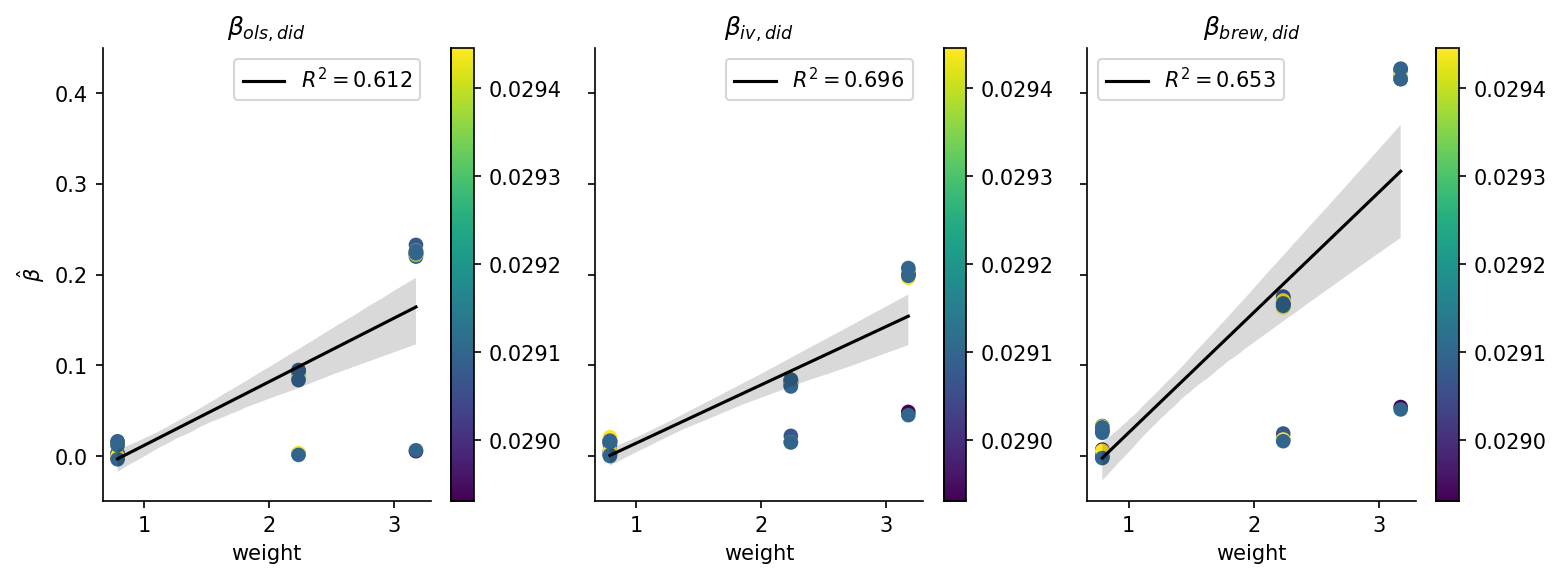

In [30]:
plot_regression(samples, index, ['beta_ols_did','beta_iv_did','beta_brew_did'])

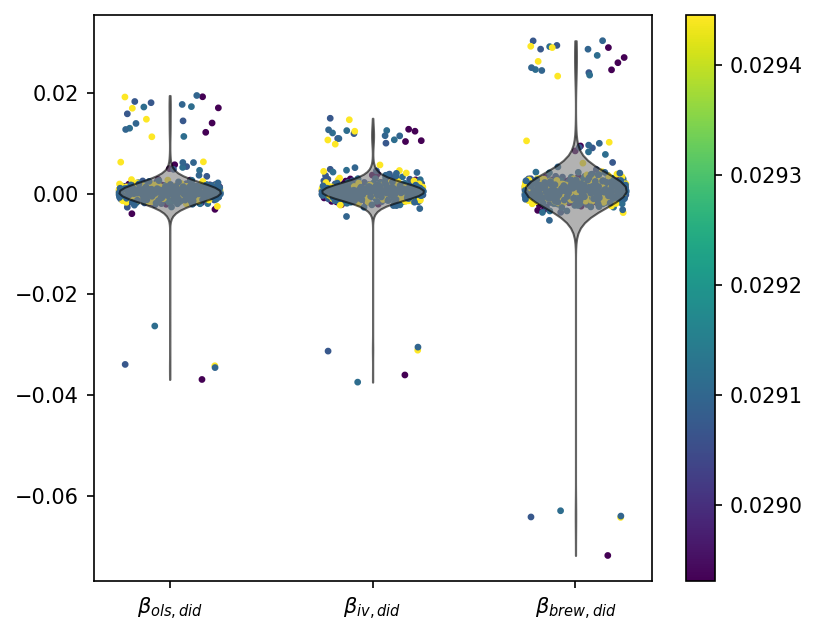

In [31]:
plot_false_positives(samples, index, ['beta_ols_did', 'beta_iv_did', 'beta_brew_did'])